In [46]:
import pandas as pd
advertising = pd.read_csv("Advertising.csv", index_col=0)

In [47]:
advertising

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [48]:
execfile('C:\\Users\\Usuario\\Repositorios\\mineria_modelizacion\\dia_1\\NuestrasFunciones.py')

In [49]:
advertising.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04,85.85,0.7,74.38,149.75,218.82,296.4
radio,200.0,23.26,14.85,0.0,9.98,22.90,36.52,49.6
newspaper,200.0,30.55,21.78,0.3,12.75,25.75,45.10,114.0
sales,200.0,14.02,5.22,1.6,10.38,12.90,17.40,27.0


In [50]:
advertising.corr().style.background_gradient(cmap='viridis').format(precision=2)

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


In [51]:
tr_tst_eval_lin('sales ~ TV', data=advertising)

Coeficiente de determinación TRAINING:  0.6059223567469822 

Root Mean squared error TEST: 3.88
Coeficiente de determinación TEST: 0.61


In [52]:
%pip install statsmodels
from statsmodels.formula.api import ols

In [53]:
mod_tv = ols('sales ~ TV', data=advertising).fit()
print(mod_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           1.47e-42
Time:                        19:26:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

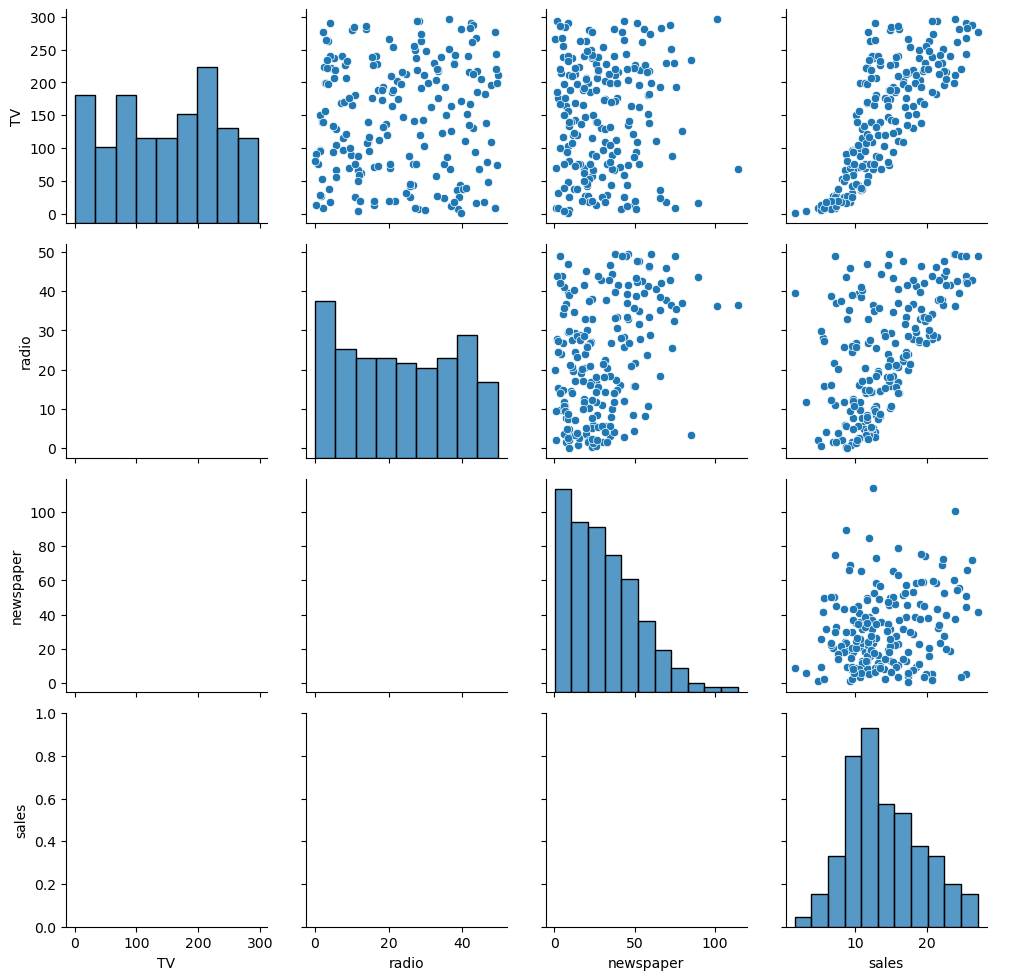

In [54]:
import seaborn as sns

g = sns.PairGrid(advertising)
g.map_diag(sns.histplot)
# g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.add_legend();

In [55]:
mod_tv_log = ols('sales ~ np.log(TV)', data=advertising).fit()
print(mod_tv_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     257.2
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           1.21e-37
Time:                        19:26:19   Log-Likelihood:                -530.44
No. Observations:                 200   AIC:                             1065.
Df Residuals:                     198   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2026      1.162     -3.616      0.0

In [56]:
mod_tv_log = ols('np.log(sales) ~ np.log(TV)', data=advertising).fit()
print(mod_tv_log.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(sales)   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     569.8
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           3.51e-60
Time:                        19:26:19   Log-Likelihood:                 28.454
No. Observations:                 200   AIC:                            -52.91
Df Residuals:                     198   BIC:                            -46.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9052      0.071     12.737      0.0

In [57]:
# Modelo elegido
mod_tv_sqrt_rad = ols('sales ~ np.sqrt(TV) + radio', data=advertising).fit()
print(mod_tv_sqrt_rad.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1288.
Date:                Fri, 28 Nov 2025   Prob (F-statistic):          7.56e-114
Time:                        19:26:19   Log-Likelihood:                -349.25
No. Observations:                 200   AIC:                             704.5
Df Residuals:                     197   BIC:                             714.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.6179      0.326     -4.968      

In [58]:
mod_tv_sqrt_rad_news = ols('sales ~ np.sqrt(TV) + radio + newspaper', data=advertising).fit()
print(mod_tv_sqrt_rad_news.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     854.3
Date:                Fri, 28 Nov 2025   Prob (F-statistic):          3.05e-112
Time:                        19:26:20   Log-Likelihood:                -349.24
No. Observations:                 200   AIC:                             706.5
Df Residuals:                     196   BIC:                             719.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.6093      0.336     -4.786      

In [73]:
# Las distintas fórmulas que probamos
form_tv_normal = 'sales ~ TV'
form_tv_sqrt = 'sales ~ np.sqrt(TV)'
form_tv_rad = 'sales ~ TV + radio'
form_tv_sqrt_rad = 'sales ~ np.sqrt(TV) + radio'
form_tv_sqrt_rad_np = 'sales ~ np.sqrt(TV) + radio + newspaper'

list_form = [form_tv_normal, form_tv_sqrt, form_tv_rad, form_tv_sqrt_rad, form_tv_sqrt_rad_np]

list_form = pd.DataFrame(map(lambda x: cross_val_lin(x,advertising, seed=2022),list_form))

results = list_form.T.melt()
results.columns = ['Modelo','R2']

# Opción 1: Usar map() para reemplazar los valores
results['Modelo'] = results['Modelo'].map({
    0: 'sales ~ TV',
    1: 'sales ~ np.sqrt(TV)',
    2: 'sales ~ TV + radio',
    3: 'sales ~ np.sqrt(TV) + radio',
    4: 'sales ~ np.sqrt(TV) + radio + newspaper'
})

results.groupby('Modelo').mean().sort_values('R2', ascending=False)

Modelo: sales ~ TV
Coeficiente de determinación R2: 0.582 (0.104)
Modelo: sales ~ np.sqrt(TV)
Coeficiente de determinación R2: 0.596 (0.092)
Modelo: sales ~ TV + radio
Coeficiente de determinación R2: 0.887 (0.038)
Modelo: sales ~ np.sqrt(TV) + radio
Coeficiente de determinación R2: 0.922 (0.020)
Modelo: sales ~ np.sqrt(TV) + radio + newspaper
Coeficiente de determinación R2: 0.920 (0.020)


,R2
Modelo,
sales ~ np.sqrt(TV) + radio,0.921719
sales ~ np.sqrt(TV) + radio + newspaper,0.920455
sales ~ TV + radio,0.887045
sales ~ np.sqrt(TV),0.595669
sales ~ TV,0.581592


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8908\1535280978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=results, x='Modelo', y='R2', palette='viridis');


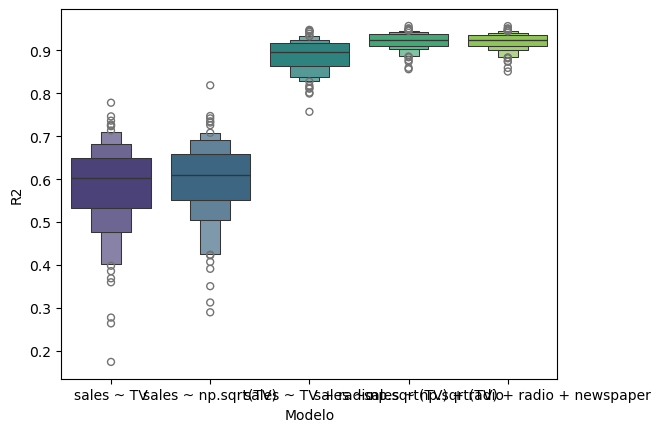

In [86]:
sns.boxenplot(data=results, x='Modelo', y='R2', palette='viridis');